In [2]:
import sys
import scipy
import numpy
import matplotlib
import sklearn
import pandas
import yfinance as yf
import lxml

print ('Python: {}:'.format(sys.version))
print( 'Scipy: {}'.format(scipy.__version__))
print( 'numpy: {}'.format(numpy.__version__))
print( 'matplotlib: {}'.format(matplotlib.__version__))
print( 'sklearn: {}'.format(sklearn.__version__))
print( 'pandas: {}'.format(pandas.__version__))
print ('yfinance: {}'.format(yf.__version__))
print ('lxml: {}'.format(lxml.__version__))

Python: 3.7.7 (default, Mar 10 2020, 15:43:33) 
[Clang 11.0.0 (clang-1100.0.33.17)]:
Scipy: 1.4.1
numpy: 1.18.2
matplotlib: 3.2.1
sklearn: 0.22.2.post1
pandas: 1.0.3
yfinance: 0.1.54
lxml: 4.5.0


In [4]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [122]:
data = pandas.read_csv('AAPL.csv')

In [123]:
data.shape

(21, 6)

In [124]:
data.head(50)

,Date,Close/Last,Volume,Open,High,Low
0,03/25/2020,$245.52,75900510,$250.75,$258.25,$244.3
1,03/24/2020,$246.88,71882770,$236.36,$247.69,$234.3
2,03/23/2020,$224.37,84188210,$228.08,$228.4997,$212.61
3,03/20/2020,$229.24,100423300,$247.18,$251.83,$228
4,03/19/2020,$244.78,67964260,$247.385,$252.84,$242.61
5,03/18/2020,$246.67,75058410,$239.77,$250,$237.12
6,03/17/2020,$252.86,81013970,$247.51,$257.61,$238.4
7,03/16/2020,$242.21,80605870,$241.95,$259.08,$240
8,03/13/2020,$277.97,92683030,$264.89,$279.92,$252.95
9,03/12/2020,$248.23,104618500,$255.94,$270,$248


In [167]:
array = data.values
for y in range(len(array)):
    for x in range(1,6):
        currency = str(array[y,x])
        if currency[1] == '$':
                array[y,x] = currency[2:]

In [168]:
array[0:5, :]

array([['03/25/2020', '245.52', 75900510, '250.75', '258.25', '244.3'],
       ['03/24/2020', '246.88', 71882770, '236.36', '247.69', '234.3'],
       ['03/23/2020', '224.37', 84188210, '228.08', '228.4997', '212.61'],
       ['03/20/2020', '229.24', 100423300, '247.18', '251.83', '228'],
       ['03/19/2020', '244.78', 67964260, '247.385', '252.84', '242.61']],
      dtype=object)

In [169]:
print(data.describe())

             Volume
count  2.100000e+01
mean   7.625923e+07
std    1.658629e+07
min    4.689322e+07
25%    6.796426e+07
50%    7.590051e+07
75%    8.418821e+07
max    1.067212e+08


 Volume    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

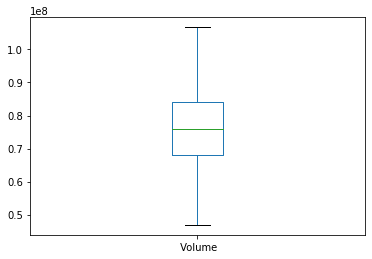

In [14]:
data.plot(kind='box', subplots='true')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1206c0e90>]],
      dtype=object)

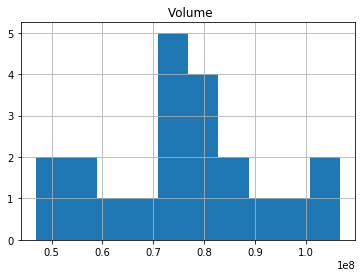

In [22]:
data.hist()

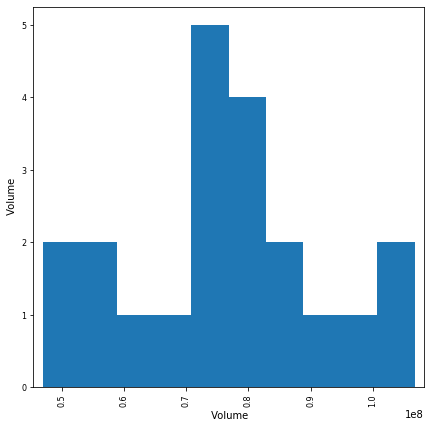

In [37]:
pandas.plotting.scatter_matrix(data, figsize=(7,7))
pyplot.show()

In [38]:
data.head(5)

,Date,Close/Last,Volume,Open,High,Low
0,03/25/2020,$245.52,75900510,$250.75,$258.25,$244.3
1,03/24/2020,$246.88,71882770,$236.36,$247.69,$234.3
2,03/23/2020,$224.37,84188210,$228.08,$228.4997,$212.61
3,03/20/2020,$229.24,100423300,$247.18,$251.83,$228
4,03/19/2020,$244.78,67964260,$247.385,$252.84,$242.61


In [170]:
# Okay I want My data to look like this:
#X_Train = Previous_high, Previous_Low, Open
#Y_Train = Close / Last 
X = numpy.append(array[1:, 4:6], array[:-1, 2:4], axis=1)
Y = array[:-1, 1]
for index, element in enumerate(Y):
    if Y[index] > X[index,3]:
        Y[index] = 'Increase'
    else:
        Y[index] = 'Decrease'
X_Train, X_Validation, Y_Train, Y_Validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_Train.shape, Y_Train.shape, X_Validation.shape, Y_Validation.shape)

(16, 4) (16,) (4, 4) (4,)


In [171]:
print (X_Train[0:5, :], Y_Train[0:5])

[['251.83' '228' 84188210 '228.08']
 ['303.4' '293.13' 46893220 '295.52']
 ['250' '237.12' 67964260 '247.385']
 ['278.41' '256.37' 85349340 '282.28']
 ['279.92' '252.95' 80605870 '241.95']] ['Decrease' 'Decrease' 'Decrease' 'Increase' 'Increase']


In [173]:
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

#Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold=StratifiedKFold(n_splits=2, random_state=1, shuffle=True)
    cv_results = sklearn.model_selection.cross_val_score(model, X_Train, Y_Train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print ('%s, %f, (%f)' % (name, cv_results.mean(), cv_results.std()))
    

LR, 0.625000, (0.000000)
LDA, 0.250000, (0.000000)
KNN, 0.500000, (0.125000)
CART, 0.312500, (0.062500)
NB, 0.250000, (0.000000)
SVM, 0.625000, (0.000000)


In [174]:
model = SVC(gamma='auto')
model.fit(X_Train, Y_Train)
predictions = model.predict(X_Validation)

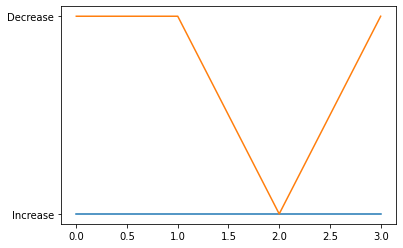

In [175]:
pyplot.plot(predictions)
pyplot.plot(Y_Validation)
pyplot.show()

In [176]:
predictions.shape

(4,)

In [177]:
print(Y_Validation)

['Decrease' 'Decrease' 'Increase' 'Decrease']


In [178]:
print (predictions)

['Increase' 'Increase' 'Increase' 'Increase']
